In [ ]:
'''
그림 plot은
plt.imshow(img_landmark)
plt.show()
'''

'\n그림 plot은\nplt.imshow(img_landmark)\nplt.show()\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/aiffel/photo_cv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/aiffel/photo_cv


In [ ]:
# 필요 패키지 import

import os
import cv2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import dlib

In [ ]:
# 경로 저장

me_img_path = './me.jpg'
cat_img_path = './cat.png'

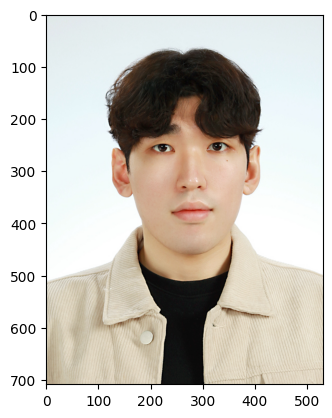

In [ ]:
# 데이터 read and display

img_bgr_me = cv2.imread(me_img_path)
rgb_me = cv2.cvtColor(img_bgr_me,cv2.COLOR_BGR2RGB)

bgr_cat = cv2.imread(cat_img_path)
rgb_cat = cv2.cvtColor(bgr_cat, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_me)
plt.show()


In [ ]:
# declare detector
def detector(img_rgb_me) :

  detector_hog = dlib.get_frontal_face_detector()
  dlib_rects = detector_hog(img_rgb_me, 1)
  print(dlib_rects)

  img_detect = img_rgb_me.copy() # 생성된 detector가 누적 저장 되는 것을 방지
  for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽
    cv2.rectangle(img_detect, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

  plt.imshow(img_detect)
  plt.show()
  return dlib_rects, img_detect


rectangles[[(167, 217) (390, 440)]]


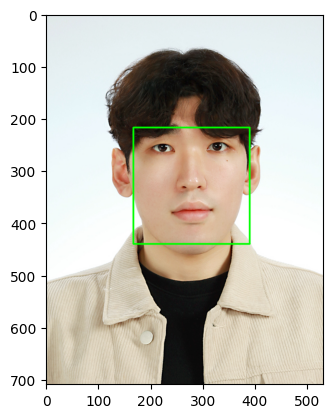

In [ ]:
rects , img_detect = detector(rgb_me)

In [ ]:
# landmark model
model_path = './shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [ ]:
#landmark
def mk_landmarks(model, rects, img) :

  list_landmarks = []

  for rect in rects :
    points = landmark_predictor(img, rect)
    list_points = list(map(lambda p :(p.x,p.y),points.parts()))
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)

  img_landmark = rgb_me.copy()
  for landmarks in list_landmarks :
      for point in landmarks :
        cv2.circle(img_landmark, point, 3, (255,0,255),-1)

  return list_landmarks , img_landmark

In [ ]:
list_landmarks, img_landmark = mk_landmarks(landmark_predictor, rects, rgb_me)

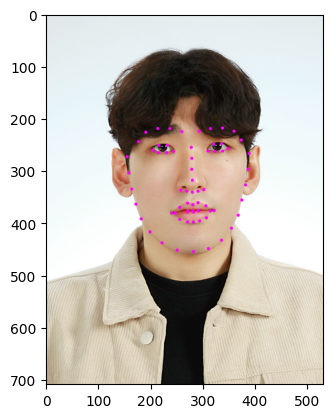

In [ ]:
plt.imshow(img_landmark)
plt.show()

In [ ]:
# sel cat size & position
for rect, landmark in zip (rects, list_landmarks) :
  w = np.abs(landmark[2][0] - landmark[16][0]) *3 // 2
  h = np.abs(landmark[57][1] - landmark[27][1])
  x = (landmark[29][0] + landmark[33][0]) // 2 + w//2
  y = (landmark[29][1] + landmark[33][1]) // 2 + h//2


In [ ]:
print (f'(x,y) : ({x},{y})')
print (f'(w,h) : ({w},{h})')

(x,y) : (447,390)
(w,h) : (337,143)


In [ ]:
# change cat size & color
change_color_cat = np.invert(rgb_cat) # 흑백 반전 # 삽입시 black2white, white2black
img_cat_size = cv2.resize(change_color_cat,(w,h))



In [ ]:
def oversize (img, x, y, w, h) :
  refined_x = x - w
  refined_y = y - h
  refine_img = img.copy() #그림 덮어써지는 것 방지

  if refined_x < 0:
    refine_img = refine_img[:, -refined_x:]
    refined_x = 0

  if refined_y < 0:
    refine_img = refine_img[-refined_y:, :]
    refined_y = 0

  return refined_x, refined_y, refine_img

In [ ]:
tuned_x , tuned_y , tune_cat = oversize(img_cat_size,x, y, w, h)

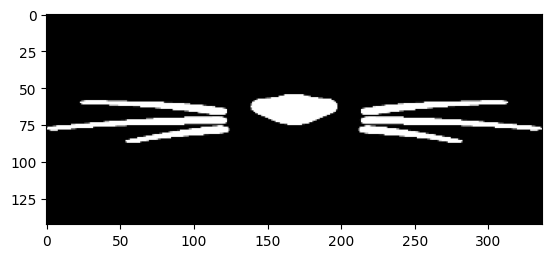

In [ ]:
plt.imshow(tune_cat)
plt.show()

In [ ]:
black_rgb_me = rgb_me.copy()

In [ ]:
sticker_area = rgb_me[tuned_y:tuned_y+tune_cat.shape[0], tuned_x:tuned_x+tune_cat.shape[1]]

rgb_me[tuned_y:tuned_y+tune_cat.shape[0], tuned_x:tuned_x+tune_cat.shape[1]] = \
    np.where(tune_cat==0,sticker_area,tune_cat).astype(np.uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

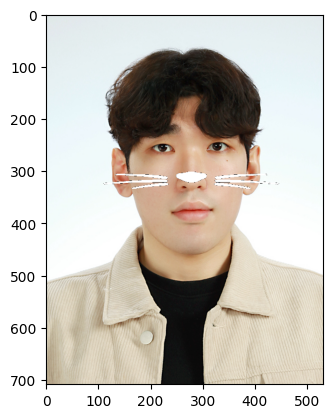

In [ ]:
plt.imshow(rgb_me)

plt.show

In [ ]:
black_rgb_me =np.invert(black_rgb_me)

In [ ]:
sticker_area = black_rgb_me[tuned_y:tuned_y+tune_cat.shape[0], tuned_x:tuned_x+tune_cat.shape[1]]

black_rgb_me[tuned_y:tuned_y+tune_cat.shape[0], tuned_x:tuned_x+tune_cat.shape[1]] = \
    np.where(tune_cat==0,sticker_area,tune_cat).astype(np.uint8)

In [ ]:
black_rgb_me = np.invert(black_rgb_me)

<function matplotlib.pyplot.show(close=None, block=None)>

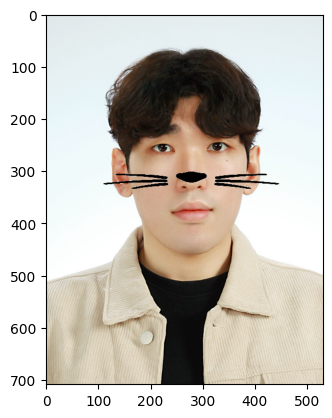

In [ ]:
plt.imshow(black_rgb_me)

plt.show

# 회고

왜 검정색은 반환할 때, 색으로 인지를 못하지?

설마 0,0,0 이라서 인식을 안하는건가?


회전된거 인식도 안되네,,,

rect 도 안나오고 model인식 안되는거 같다.

image는 어떻게 돌리지?

rotate 랑 twist 해도 얼마나 회전할 지 어떻게 인식하지?

멀리있는 사진 얼굴도 인식도 안됨

후 어렵군